## Welcome to this Machine Learning workshop! 

In this workshop you will be guided through a typical Machine Learning workflow.\
There are different steps involved in this process: 
1. Reading the dataset
2. Exploratory Data Analysis (EDA)
3. Feature preprocessing
4. Model definition and performance evaluation
5. (optionally) model introspection

The data we will work with is acquired from a Parkinson's Disease patient that underwent Deep Brain Stimulation surgery. Electrocorticography (ECoG) and Local Field Potentials (LFP) from the Subthalamic Nucleus (STN) were collected.\
The patient was instructed to perform a selfpaced movement task.

The overall context of this analysis is decoding movement for triggering adaptive DBS, as shown in the following Figure:

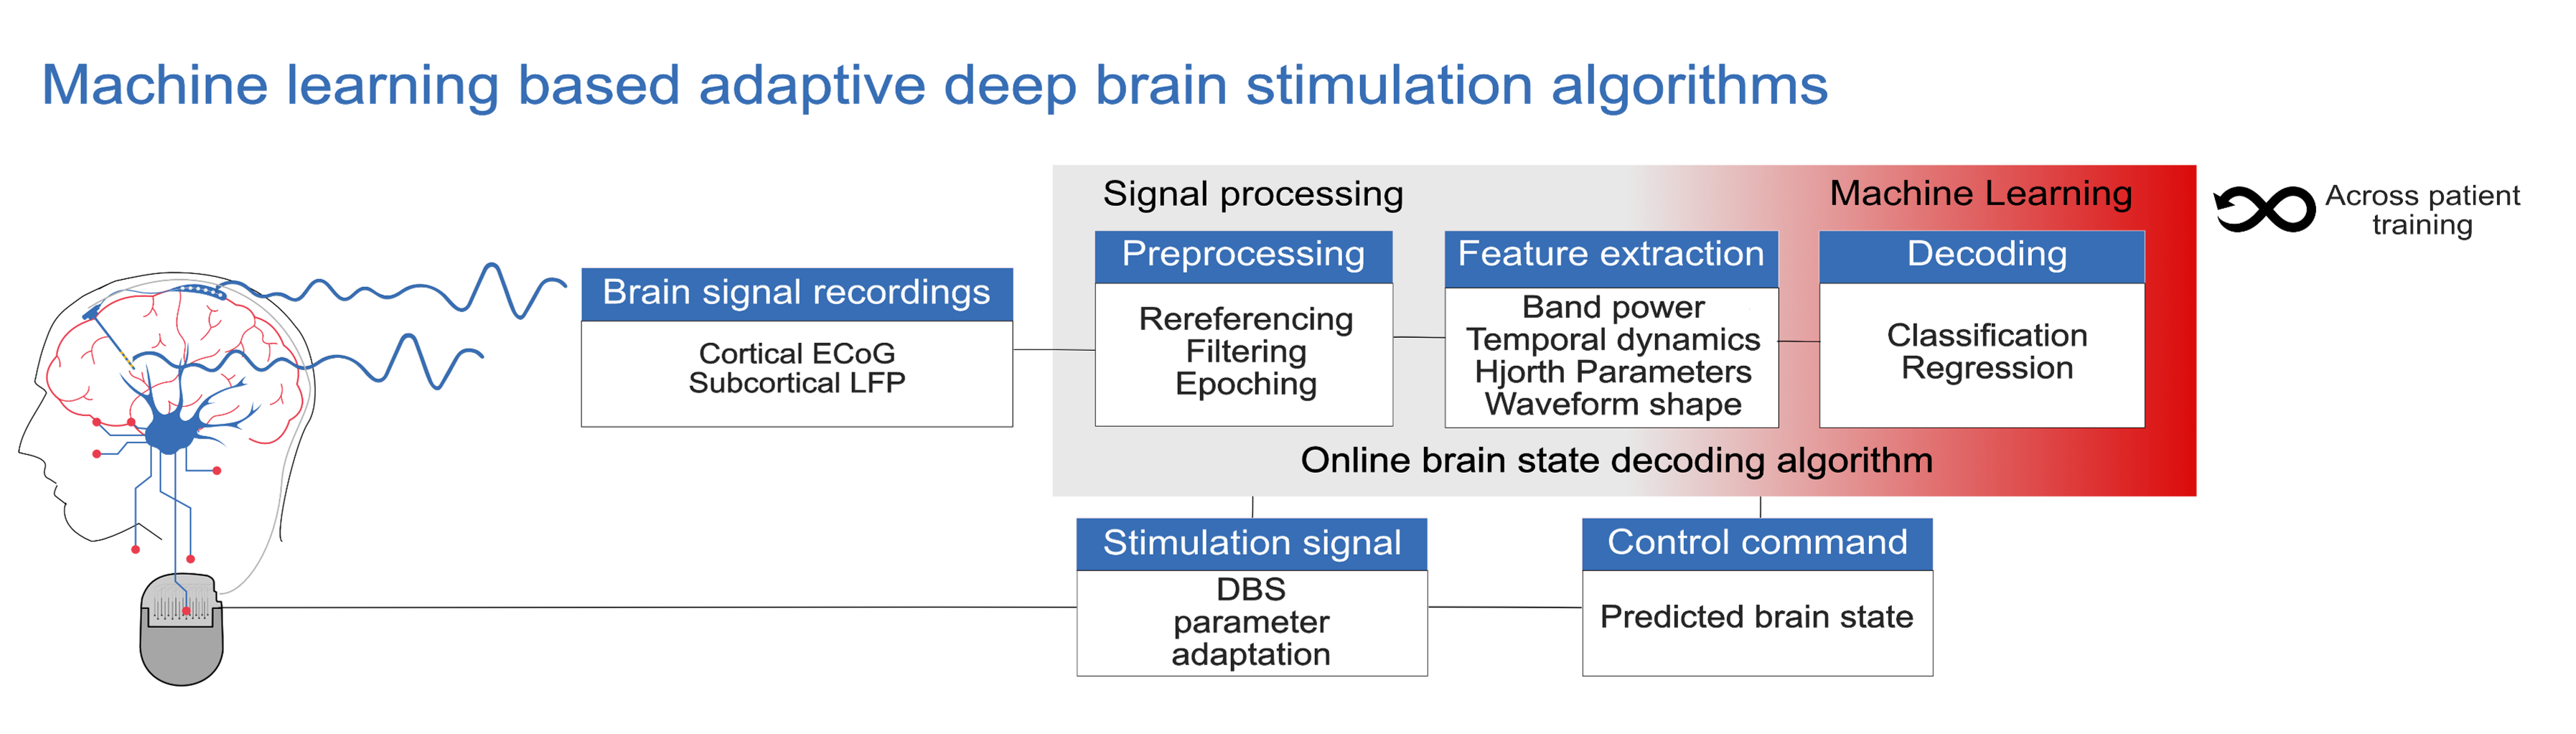

For this workshop we will start using a dataset that was generated by [py_neuromodulation](https://github.com/neuromodulation/py_neuromodulation).\
This framework does sample-wise automatic feature extraction of different modalities. Feel free to reach out and use it! 👍

Starting of with our analysis, we first have to import necessary standard libraries: 

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

### 0. Run py_neuromodulation example data

In [ ]:
!python 

#### 1. Reading the data

We will read our dataset using pandas. The data contains precomputed oscillatory activity features, estimated by *py_neuromodulation*.\
We will load it from the BIDS derivatives folder:

In [ ]:
df = pd.read_csv('examples/data/derivatives/sub-testsub_ses-EphysMedOff_task-buttonpress_run-0_ieeg/sub-testsub_ses-EphysMedOff_task-buttonpress_run-0_ieeg_FEATURES.csv', index_col=[0])

#### 2. Exploratory Data Analysis
Now we will analyze some features. First we will extract the label for our machine learning analysis, which is in this task a movement trace of a rotational handle, that the patient operated. 

✅ **Task: plot the column 'ANALOG_ROT_R_1' over the 'time' column**.

*Hint: matplotlib pyplot is your friend :)* 

Since we want to build a machine learning classifier, that expects discrete values, we need to binarize the continous analog voltage.\
We will call it 'mov_class' and save it to the dataframe. 

In [ ]:
df["mov_class"] = np.array(df["ANALOG_ROT_R_1"]<0, int)

Next we will explore the data further to get some understanding of the features we will use.

✅ **Task: Plot a single feature over time**. 

*Hint: As seen above, you can access columns of a pandas dataframe by df["column_name"]*

In [ ]:
feature = # YOUR CODE HERE
plt.plot(df["time"], ) # YOUR CODE HERE
plt.title(feature)
plt.xlabel("Time [ms]")

Now we want to select a single electrocorticographical channel called 'ECOG_AT_SM_L_1'.

✅ **Task: Select all features of a single channel into a new pandas dataframe called 'df_ECOG_L_1'**

*Hint: Setup a list first, with all columns of the dataframe df containing the channel name. Then simply access the dataframe by that list df[list]. Please reach out if things are unclear!*

In [ ]:
ch_name = "ECOG_AT_SM_L_1"
features_ch = # YOUR CODE HERE
df_ECOG_L_1 = # YOUR CODE HERE

We will now have a closer look at the features of channels 'ECOG_AT_SM_L_1'. Our first analyze will be looking at an image of the features over time.

✅ **Task: Use the matplotlib.pyplot.imshow function to plot all features from 'df_ECOG_L_1'. Overlay the label 'mov_class' that we created above**

*Hint: Plot first the dataframe 'ECOG_AT_SM_L_1' using plt.imshow(), then you can call plt.plot() for plotting the df["mov_class"] label on top of the same figure, which uses a different y-axis.*

*For nicer visualization you can also call the plt.xticks and plt.yticks functions.*

In [ ]:
plt.imshow # YOUR CODE HERE, for plotting df_ECOG_L_1
plt.plot # YOUR CODE HERE, for plotting df["mov_class"]
plt.yticks(np.arange(0, 7, 1), df_ECOG_L_1.columns)
plt.xticks(np.arange(0, df["time"].shape[0], 10), np.round(df["time"][::10]/1000,2))
plt.xlabel("Time [s]")
plt.title("raw features")
plt.legend()
plt.gca().invert_yaxis()
plt.show()

We can also explore other analysis methods. The package [seaborn](https://seaborn.pydata.org/) provides many helpful visualizations for pandas dataframes. 

✅ **Task: Test now the seaborn [heatmap](https://seaborn.pydata.org/generated/seaborn.heatmap.html) method for plotting the correlations of the 'df_ECOG_L_1' features.**

*Hint: Estimate first the correlation matrix of the feature dataframe, use then the seaborn heatmap function for plotting this correlation matrix.*

In [ ]:
import seaborn as sns

In [ ]:
corr = # YOUR CODE HERE

In [ ]:
sns.heatmap(data=corr)

✅ **Task: Visualize in a boxplot the features separated for mov_class 0 or 1**

First we extract the dataframe segments where mov_class is 0 or 1. Then we usepd.melt for reshaping the dataframe into 'variable' and 'value' columns. A third column 'mov' is added, being 0 or 1. The dataframes are then combined using pd.concat. 

Your task is now to call boxplot with the features on the x-axis, and y-axis being the values. Set the hue parameter for the movement cass.

*Hint: Have a look at df_sns to check the column names, which we will then use for sns.boxplot*

In [ ]:
df_mov = pd.melt(df_ECOG_L_1[df["mov_class"]==0])
df_mov["mov"] = 0
df_rest = pd.melt(df_ECOG_L_1[df["mov_class"]==1])
df_rest["mov"] = 1

df_sns = pd.concat([df_mov, df_rest])

In [ ]:
sns.boxplot(x=, y=, hue=, data=df_sns)  # YOUR CODE HERE

#### 3. Feature Preprocessing

We will now define the dataset for the following analaysis. For that, we use all available features coming from 'ECOG' or 'LFP' channels.

The label will be the upper defined *mov_class*. 

In [ ]:
X = df[[ch for ch in df.columns if "ECOG" in ch or "LFP" in ch]]
Y = df["mov_class"]

#### Preprocessing Scaling

✅ **Task: Use the sklearn [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) function to scale the data 'X' to zero mean and unit variance and save it as the variable 'X_scaled'.**

Check for a single feature if standard scaling (commonly called *z-scoring*) was applied beforehand and if it worked after applying the operation.

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
print(X.iloc[:,0].mean())  # before scaling
print(X.iloc[:,0].std())

In [ ]:
X_scaled = # YOUR CODE HERE

In [ ]:
print(X_scaled.iloc[:,0].mean())  # after scaling
print(X_scaled.iloc[:,0].std())

#### Preprocessing Dimensionality Reduction

We will now apply a dimensionality reduction method called *Principal Component Analysis* (PCA).\
PCA finds an orthonormal basis, preserving as much variance of the data as possible. It can be shown that the principle components are eigenvectors of the data covariance matrix.

For visualization reason we will pick here only two components, and enable whitening to have zero mean and unit variance features, which will in turn be beneficial for many classifiers.

✅ **Task: Define a sklearn [PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) object called 'pca' with two components, and *whitening* set to True. Transform the scaled data then and save it to a variable called 'X_transformed'. 
Then, plot in a scatter plot the two transformed components, set the color to the defined label *y*.**


In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = # 1. Define a sklearn PCA object, with 2 components and whitening set to true

pca. # 2. Call the pca.fit function for solving the SVD problem

X_transform = # 3. Call the pca.transform function for projecting the data in 2 dimensions

In [ ]:
plt.scatter(X_transform[:,0], X_transform[:,1], c=y, s=100, alpha=0.4)
plt.xlabel("PC #1")
plt.ylabel("PC #2")
plt.title("PCA 2D projection")
plt.show()

Now we have made a dimensionality reduction coming from 77 to 2 features. The data seems segmented enough to be learned by a simple classifier right?


Let's test a first classifier, and visualize the decision boundaries.

✅ **Task: Use sklearn's [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html?highlight=train_test_split#sklearn.model_selection.train_test_split) method to split data with a 40% test size into training and test set.**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = # YOUR CODE HERE for splitting X_transform into train and test sets

#### 4. We now evaluate a first simple model

✅ **Task: Use a [LogisticRegression Model](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) without any regularization (check documentation parameters) to fit the data and report the resulting [accuracy_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html) on the test set.**

In [ ]:
from sklearn import linear_model, metrics

In [ ]:
clf = # YOUR CODE HERE for defining the linear_model.LogisticRegression

In [ ]:
clf.fit( # YOUR CODE HERE for fitting / training the model on the training set

In [ ]:
y_test_predict = clf.predict(  # YOUR CODE HERE for predicting the test set

In [ ]:
score = metrics.accuracy_score(  # YOUR CODE HERE for model evaluation on the test set

Great! We will now use the classifiers 'decision_function' to visualize the model's predictions.\
First let's define a grid where we can test our fitted classifier on:

In [ ]:
h = .02  # step size in the mesh

x_min, x_max = X_transformed[:, 0].min() - .3, X_transformed[:, 0].max() + .3
y_min, y_max = X_transformed[:, 1].min() - .3, X_transformed[:, 1].max() + .3
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Now plot the decision function as well as individual data points. To distinguish the test set points we will set the edgecolor to 'red':

In [ ]:
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])

ax = plt.subplot()
Z = Z.reshape(xx.shape)
ax.contourf(xx, yy, Z, alpha=.8)
ax.scatter(X_test[:,0], X_test[:,1], c=y_test, edgecolors='red', label='Test')
ax.scatter(X_train[:,0], X_train[:,1], c=y_train, label='Training')

plt.xlabel("Principal Component #1")
plt.ylabel("Principal Component #2")
plt.legend()

plt.title("Logistic Regression Linear Classification Decision Boundary")

### Group Discussion 💬

Revise the previous machine learning pipeline steps. Make a list of what could be optimized and what lead to a possibly faulty model evaluation.

Think about:
1. At which stage did we split data in training and test set? Before or after scaling and dimensionality reduction? At which stages did we use the test set?
2. Have a look at the label again, have the classes equal sample size?
3. Do you think the classifier we choose was optimal? What could be improved?
4. Tricky discussion point: Think about how many samples in time e.g. alpha / theta band activity needs for estimation? Are features in time correlated? How could we account for that?